In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [22]:
df= pd.read_csv('parkinsons_telemonitoring.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   test_time      5875 non-null   float64
 2   Jitter(%)      5875 non-null   float64
 3   Jitter(Abs)    5875 non-null   float64
 4   Jitter:RAP     5875 non-null   float64
 5   Jitter:PPQ5    5875 non-null   float64
 6   Jitter:DDP     5875 non-null   float64
 7   Shimmer        5875 non-null   float64
 8   Shimmer(dB)    5875 non-null   float64
 9   Shimmer:APQ3   5875 non-null   float64
 10  Shimmer:APQ5   5875 non-null   float64
 11  Shimmer:APQ11  5875 non-null   float64
 12  Shimmer:DDA    5875 non-null   float64
 13  NHR            5875 non-null   float64
 14  HNR            5875 non-null   float64
 15  RPDE           5875 non-null   float64
 16  DFA            5875 non-null   float64
 17  PPE            5875 non-null   float64
 18  sex     

In [23]:
df.head()

,age,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,...,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex,motor_UPDRS,total_UPDRS
0,72,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,...,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0,28.199,34.398
1,72,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,...,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,0,28.447,34.894
2,72,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,...,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,0,28.695,35.389
3,72,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,...,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,0,28.905,35.810
4,72,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,...,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,0,29.187,36.375


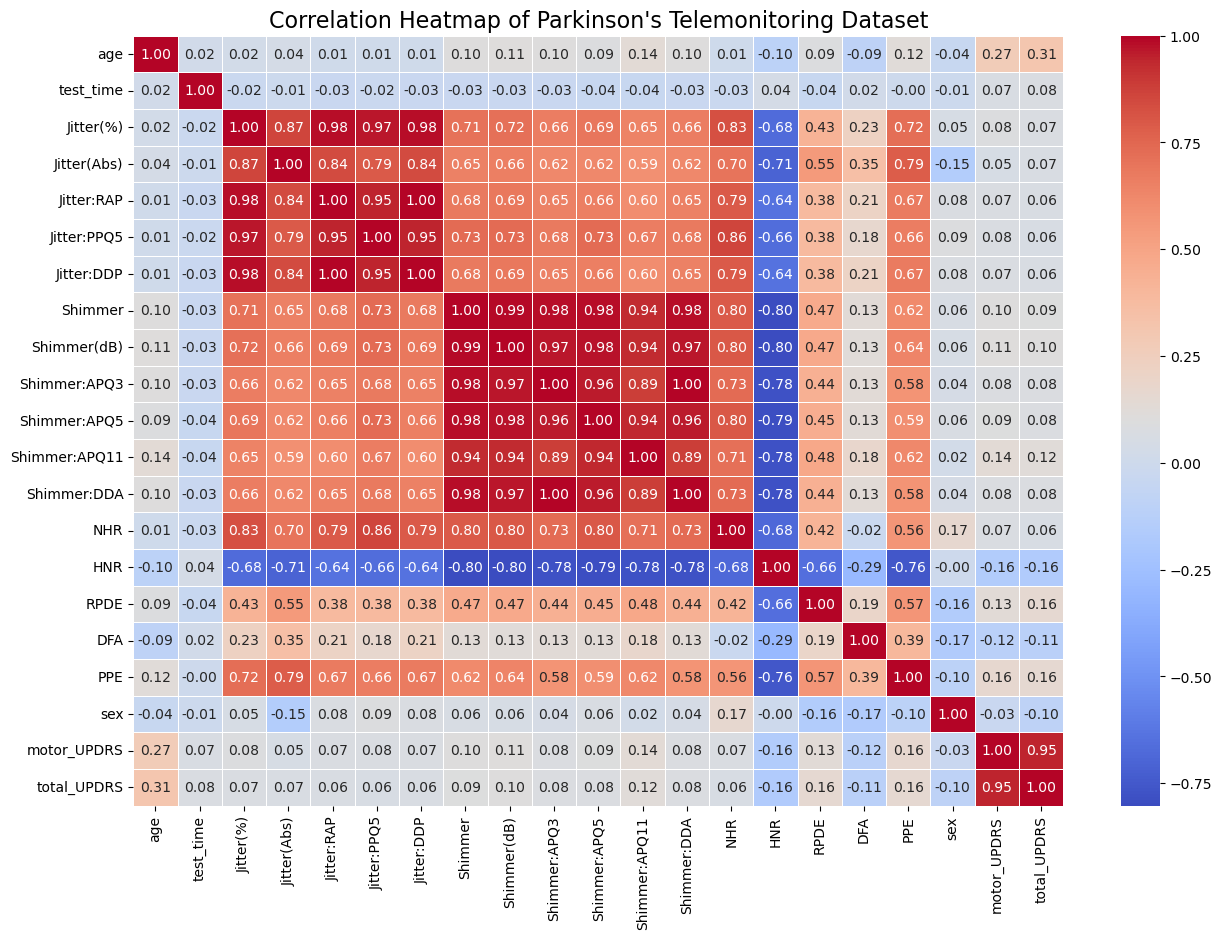

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Parkinson's Telemonitoring Dataset", fontsize=16)
plt.show()

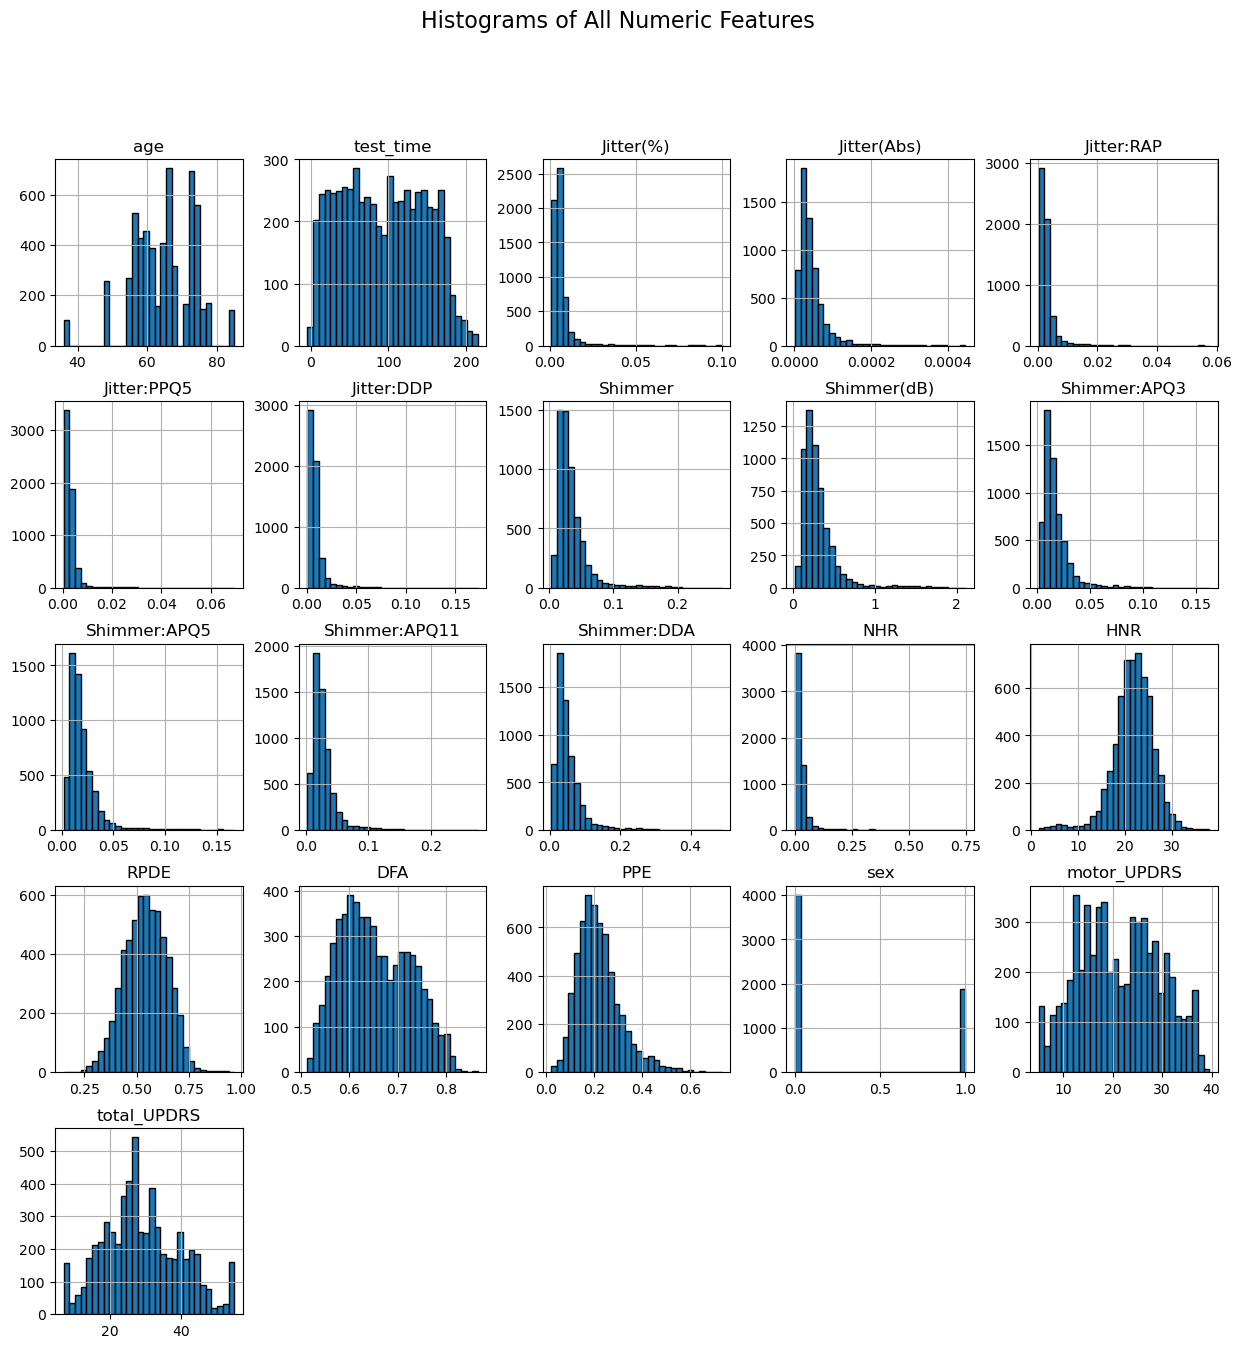

In [25]:
df.hist(figsize=(15,15), bins=30, edgecolor='black')
plt.suptitle("Histograms of All Numeric Features", fontsize=16)
plt.show()


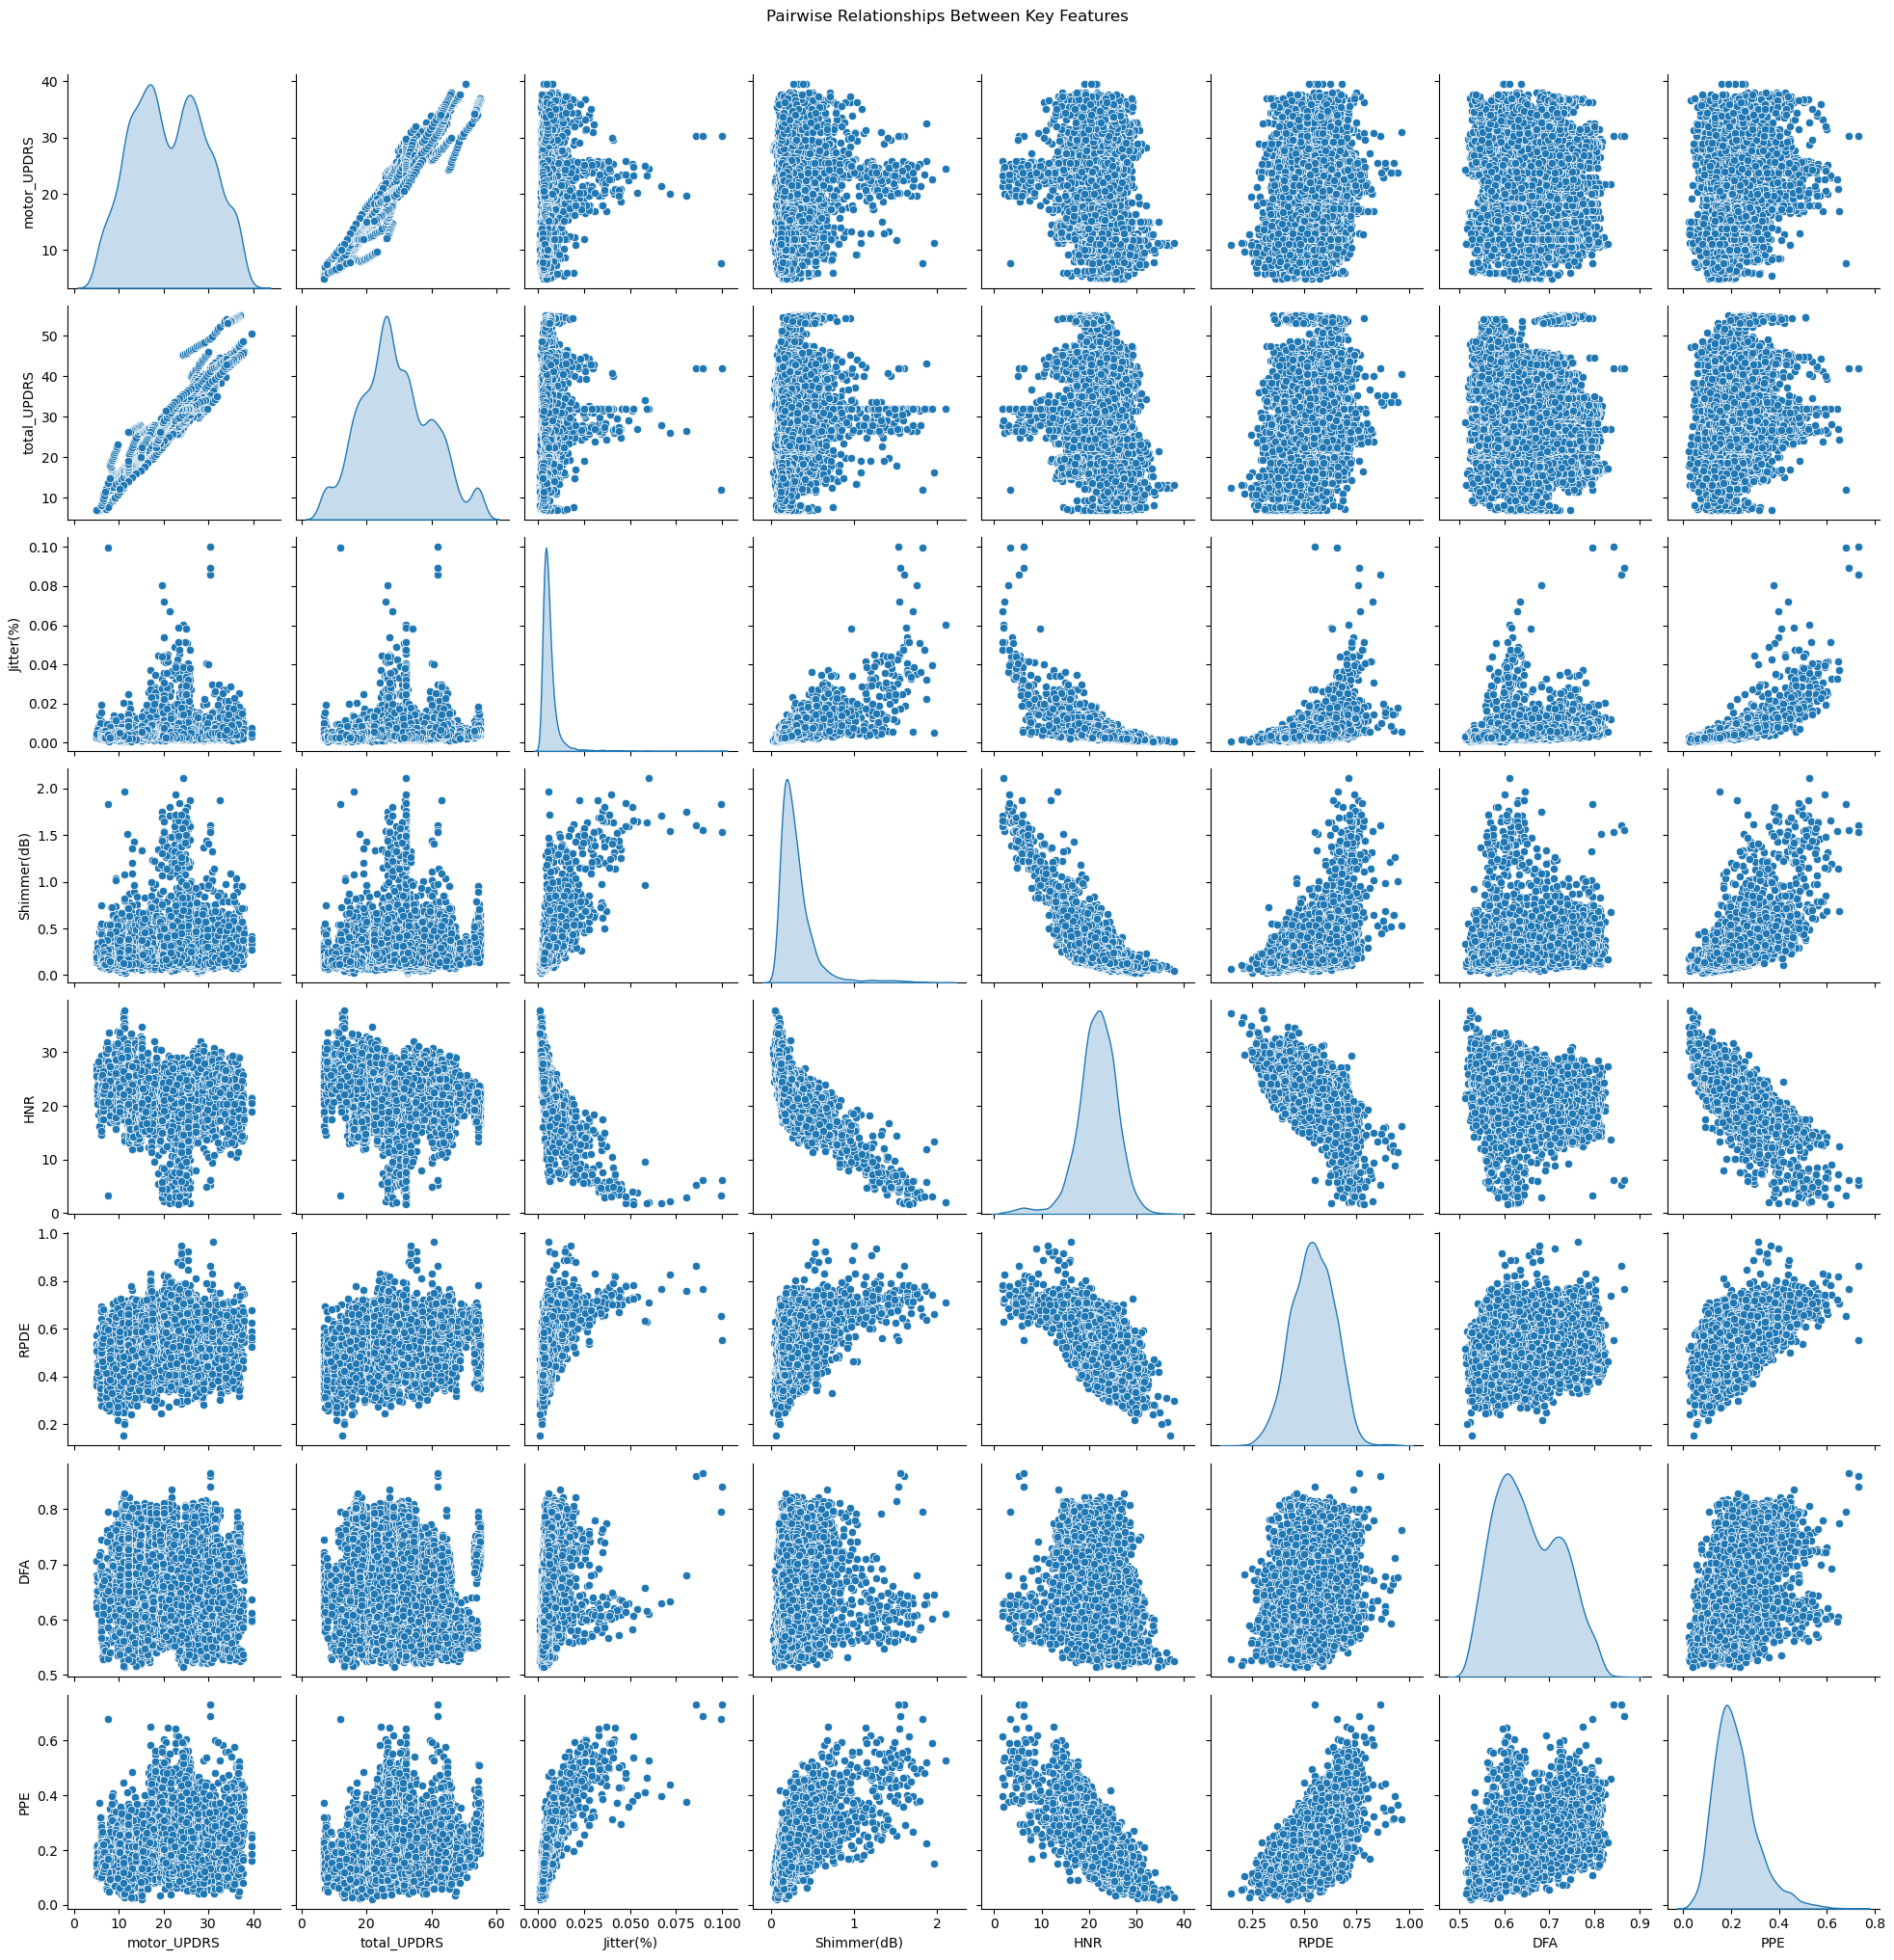

In [26]:
sns.pairplot(df[['motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Shimmer(dB)', 'HNR', 'RPDE', 'DFA', 'PPE']], diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()


In [27]:
corr = df.corr()['total_UPDRS'].sort_values(ascending=False)
print(corr)
print("correlation to tatal_UPDRS ")

total_UPDRS      1.000000
motor_UPDRS      0.947231
age              0.310290
RPDE             0.156897
PPE              0.156195
Shimmer:APQ11    0.120838
Shimmer(dB)      0.098790
Shimmer          0.092141
Shimmer:APQ5     0.083467
Shimmer:DDA      0.079363
Shimmer:APQ3     0.079363
test_time        0.075263
Jitter(%)        0.074247
Jitter(Abs)      0.066926
Jitter:DDP       0.064027
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
NHR              0.060952
sex             -0.096559
DFA             -0.113475
HNR             -0.162117
Name: total_UPDRS, dtype: float64
correlation to tatal_UPDRS 


It can be concluded that all jitter values are highly correlated and any one of jitter measure is required, same for shimmer measures.
 Test time and sex have weak correlation so can be removed

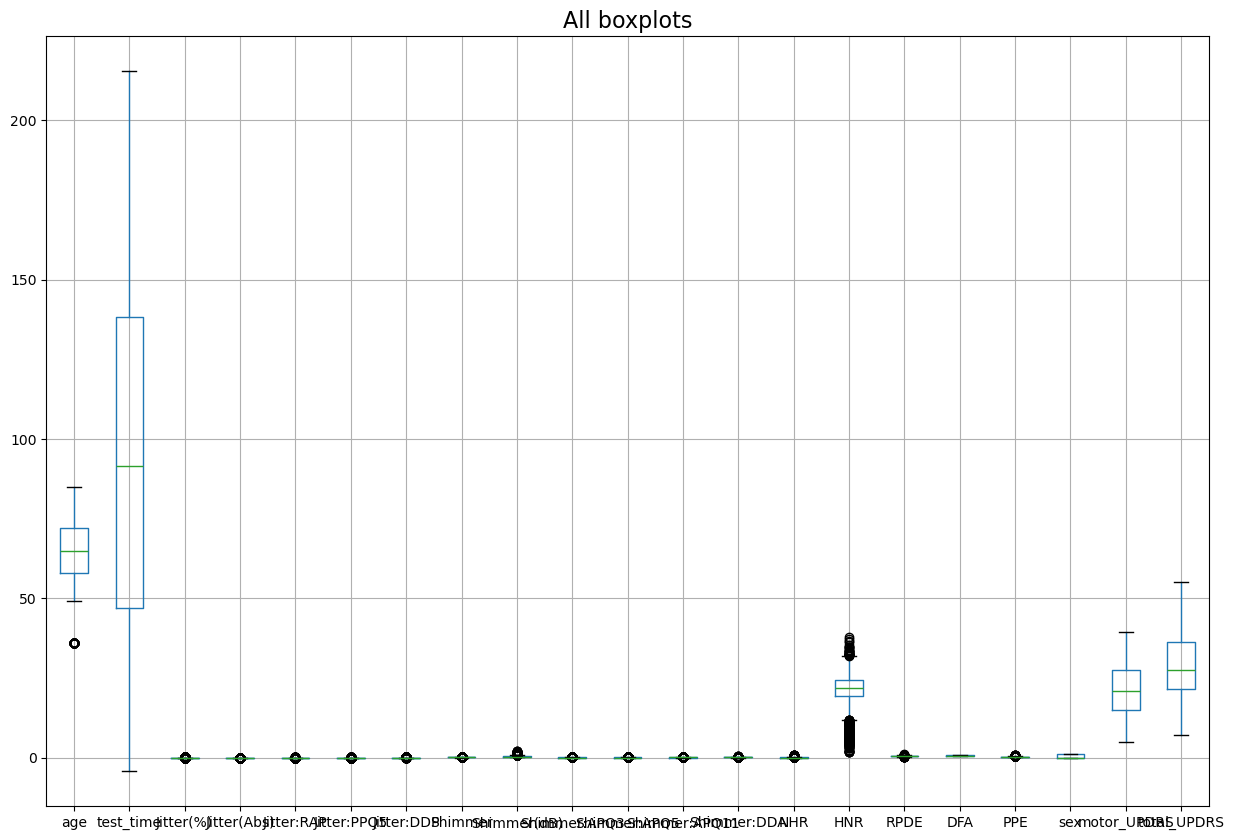

In [28]:
df.boxplot(figsize=(15,10))
plt.title("All boxplots",fontsize=16)
plt.show()

In medical there can be exceptional cases so outliers which doesn't seems impossible are fine


# Preprocessing

In [29]:
drop_columns=['Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP','Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA','test_time','sex']
df=df.drop(drop_columns,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   Jitter(%)      5875 non-null   float64
 2   Shimmer:APQ11  5875 non-null   float64
 3   NHR            5875 non-null   float64
 4   HNR            5875 non-null   float64
 5   RPDE           5875 non-null   float64
 6   DFA            5875 non-null   float64
 7   PPE            5875 non-null   float64
 8   motor_UPDRS    5875 non-null   float64
 9   total_UPDRS    5875 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 459.1 KB


In [47]:
from sklearn.model_selection import train_test_split

x,y=df.drop(columns=['total_UPDRS','motor_UPDRS'],axis=1),df['total_UPDRS']
X_train,X_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.2)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))       


In [49]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Initialize models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
svm = SVR(kernel='rbf')

# Create Voting Regressor (ensemble of RF, DT, and SVM)
voting = VotingRegressor([('rf', rf), ('dt', dt), ('svm', svm)])

# Fit the model
voting.fit(X_train, y_train.ravel())  # converting to 1D

# Predict
y_pred_scaled = voting.predict(X_test)
y_pred_voting = y_pred_scaled.reshape(-1, 1)

# Evaluation
print("VotingRegressor: Result")
print("R2 Score:", r2_score(y_test, y_pred_voting))
print("RMSE:", root_mean_squared_error(y_test, y_pred_voting))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_voting))


VotingRegressor: Result
R2 Score: 0.8073279035175454
RMSE: 0.44013325899044076
Mean Absolute Error: 0.32659293840171727


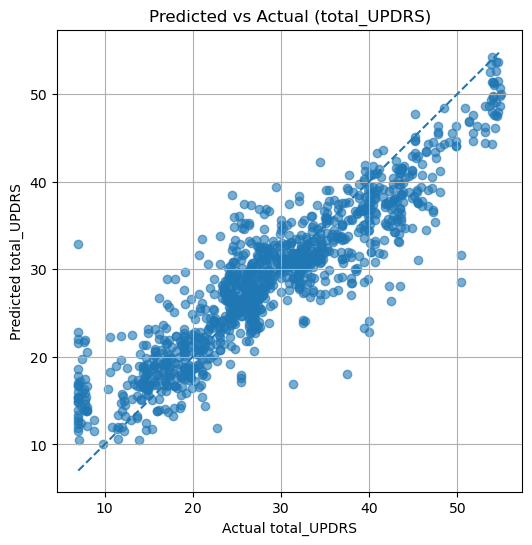

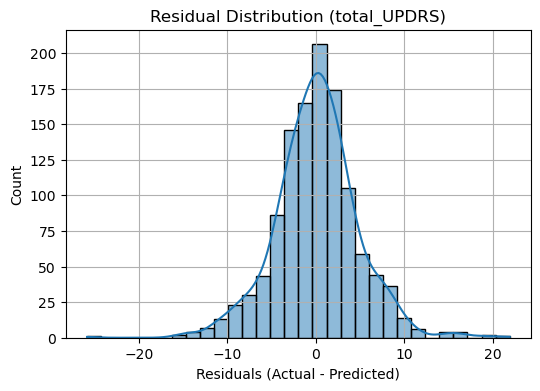

In [ ]:

y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_voting)

plt.figure(figsize=(6,6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         linestyle='--')
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title("Predicted vs Actual (total_UPDRS)")
plt.grid(True)
plt.show()



residuals = y_test_inv.flatten() - y_pred_inv.flatten()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (total_UPDRS)")
plt.grid(True)
plt.show()



Preparing data for SHAP analysis...
Plotting SHAP Summary Plot...


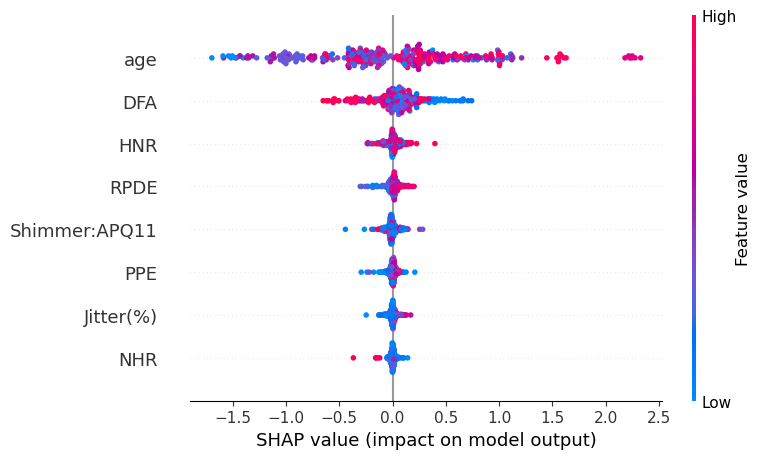

Plotting SHAP Feature Importance Bar Plot...


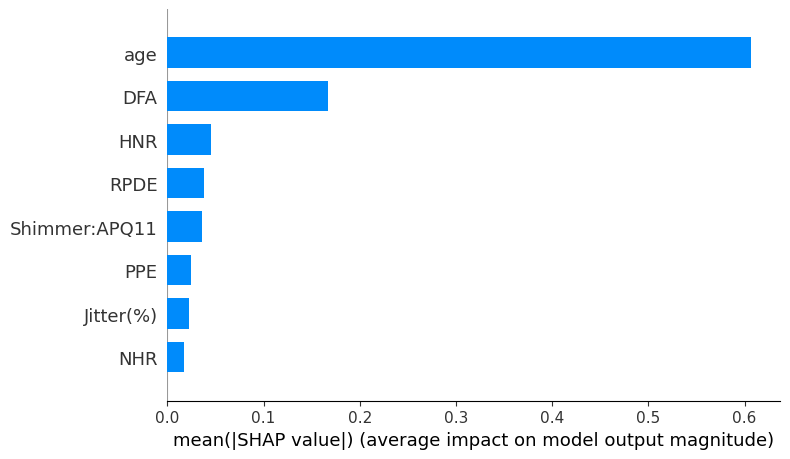

Plotting SHAP Dependence Plot for feature: age


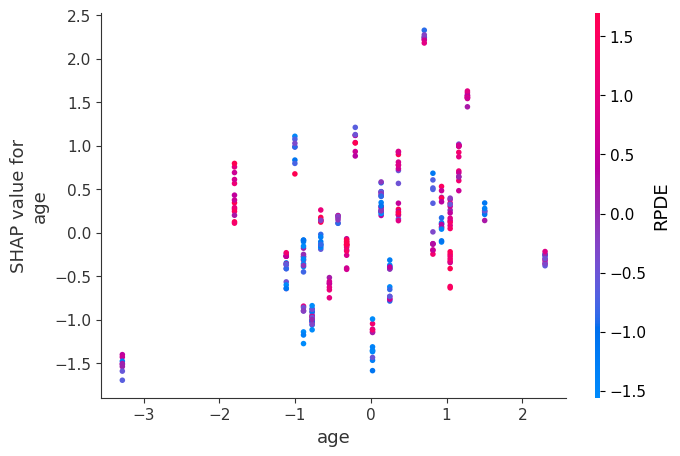

Plotting SHAP Force Plot for sample index 5...


Plotting SHAP Decision Plot...


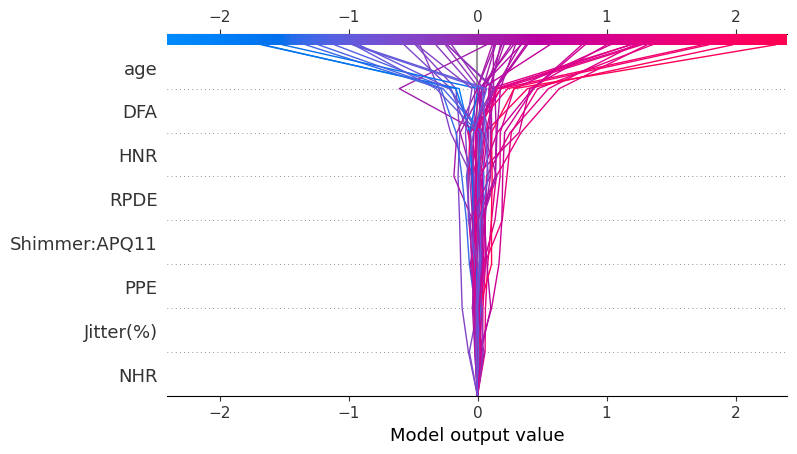

In [33]:
import shap
import numpy as np
import pandas as pd

print("\nPreparing data for SHAP analysis...")

# Explain only tree-based models from VotingRegressor
explainer_rf = shap.TreeExplainer(voting.estimators_[0])  # Random Forest
explainer_dt = shap.TreeExplainer(voting.estimators_[1])  # Decision Tree
# voting.estimators_[2] is SVR → skipped (not tree-based)

# Use subset for performance
X_sample = X_test[:300]
X_sample_df = pd.DataFrame(X_sample, columns=x.columns)

# Compute SHAP values for both models
shap_values_rf = explainer_rf.shap_values(X_sample)
shap_values_dt = explainer_dt.shap_values(X_sample)

# Average SHAP values for ensemble approximation
shap_values_avg = (np.array(shap_values_rf) + np.array(shap_values_dt)) / 2

# ---- SHAP Visualizations ----

print("Plotting SHAP Summary Plot...")
shap.summary_plot(shap_values_avg, X_sample_df, plot_type="dot", show=True)

print("Plotting SHAP Feature Importance Bar Plot...")
shap.summary_plot(shap_values_avg, X_sample_df, plot_type="bar", show=True)

# Dependence plot for the first feature
feature_name = X_sample_df.columns[0]
print(f"Plotting SHAP Dependence Plot for feature: {feature_name}")
shap.dependence_plot(feature_name, shap_values_avg, X_sample_df, show=True)

# Force plot for a specific sample
sample_idx = 5
print(f"Plotting SHAP Force Plot for sample index {sample_idx}...")
shap.initjs()
shap.force_plot(
    explainer_rf.expected_value,
    shap_values_rf[sample_idx],
    X_sample_df.iloc[sample_idx]
)

# Decision plot for top 50 samples (using Random Forest explainer)
print("Plotting SHAP Decision Plot...")
shap.decision_plot(
    explainer_rf.expected_value,
    shap_values_rf[:50],
    X_sample_df.iloc[:50]
)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

lstm_model=Sequential([LSTM(64,activation='tanh',input_shape=(1,X_train.shape[1])),
                       Dense(32,activation='relu'),
                       Dense(8,activation='relu'),
                       Dense(1,activation='linear')
])
lstm_model.compile(optimizer='adam',loss='mse',metrics=['mae'])

X_train_lstm=X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test_lstm=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))



history=lstm_model.fit(X_train_lstm,y_train,epochs=50,batch_size=8,validation_split=0.2,verbose=2)

y_pred_lstm=lstm_model.predict(X_test_lstm)

print("LSTM Result")
print("R2 Score: ",r2_score(y_test,y_pred_lstm))
print("RMSE: ",root_mean_squared_error(y_test,y_pred_lstm))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_lstm))


Epoch 1/50


c:\Users\rakes\anaconda\envs\mlenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


470/470 - 3s - 7ms/step - loss: 0.7830 - mae: 0.7303 - val_loss: 0.8127 - val_mae: 0.7497
Epoch 2/50
470/470 - 1s - 3ms/step - loss: 0.6673 - mae: 0.6705 - val_loss: 0.7293 - val_mae: 0.7082
Epoch 3/50
470/470 - 1s - 3ms/step - loss: 0.5986 - mae: 0.6243 - val_loss: 0.6739 - val_mae: 0.6608
Epoch 4/50
470/470 - 1s - 3ms/step - loss: 0.5594 - mae: 0.5960 - val_loss: 0.6375 - val_mae: 0.6388
Epoch 5/50
470/470 - 1s - 3ms/step - loss: 0.5337 - mae: 0.5774 - val_loss: 0.6353 - val_mae: 0.6371
Epoch 6/50
470/470 - 2s - 3ms/step - loss: 0.5145 - mae: 0.5665 - val_loss: 0.6035 - val_mae: 0.6166
Epoch 7/50
470/470 - 1s - 3ms/step - loss: 0.4963 - mae: 0.5549 - val_loss: 0.6012 - val_mae: 0.6118
Epoch 8/50
470/470 - 2s - 4ms/step - loss: 0.4773 - mae: 0.5390 - val_loss: 0.5587 - val_mae: 0.5891
Epoch 9/50
470/470 - 2s - 3ms/step - loss: 0.4662 - mae: 0.5327 - val_loss: 0.5841 - val_mae: 0.5977
Epoch 10/50
470/470 - 1s - 3ms/step - loss: 0.4492 - mae: 0.5215 - val_loss: 0.5607 - val_mae: 0.5785


In [35]:
from tensorflow.keras.layers import GRU,Input

# Define GRU model
gru_model = Sequential([
    Input(shape=(1, X_train.shape[1])),
    GRU(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train
history = gru_model.fit(
    X_train_gru, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=2
)

y_pred_gru = gru_model.predict(X_test_gru)

print("GRU: Result")
print("R2 Score: ", r2_score(y_test, y_pred_gru))
print("RMSE: ", root_mean_squared_error(y_test, y_pred_gru))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred_gru))

Epoch 1/50
470/470 - 4s - 9ms/step - loss: 0.7832 - mae: 0.7210 - val_loss: 0.8126 - val_mae: 0.7501
Epoch 2/50
470/470 - 1s - 2ms/step - loss: 0.6664 - mae: 0.6635 - val_loss: 0.7040 - val_mae: 0.6847
Epoch 3/50
470/470 - 2s - 4ms/step - loss: 0.6057 - mae: 0.6213 - val_loss: 0.6632 - val_mae: 0.6590
Epoch 4/50
470/470 - 1s - 2ms/step - loss: 0.5721 - mae: 0.5994 - val_loss: 0.6424 - val_mae: 0.6414
Epoch 5/50
470/470 - 1s - 3ms/step - loss: 0.5473 - mae: 0.5835 - val_loss: 0.6222 - val_mae: 0.6272
Epoch 6/50
470/470 - 1s - 3ms/step - loss: 0.5317 - mae: 0.5727 - val_loss: 0.6026 - val_mae: 0.6187
Epoch 7/50
470/470 - 1s - 3ms/step - loss: 0.5171 - mae: 0.5649 - val_loss: 0.5910 - val_mae: 0.6147
Epoch 8/50
470/470 - 1s - 3ms/step - loss: 0.4945 - mae: 0.5498 - val_loss: 0.5934 - val_mae: 0.6034
Epoch 9/50
470/470 - 2s - 3ms/step - loss: 0.4784 - mae: 0.5413 - val_loss: 0.5662 - val_mae: 0.5843
Epoch 10/50
470/470 - 3s - 6ms/step - loss: 0.4708 - mae: 0.5356 - val_loss: 0.5529 - val_m

# for predicting 'total_UPDRS' voting classifier has highest R2_Score

In [36]:
import joblib
joblib.dump(voting, "total_UPDRS_model.pkl")
joblib.dump(scaler_x,"scalar_x_for_total_UPDRS")
joblib.dump(scaler_y,"scalar_y_for_total_UPDRS")

['scalar_y_for_total_UPDRS']

In [37]:
df.head()

,age,Jitter(%),Shimmer:APQ11,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,72,0.00662,0.01662,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,72,0.00300,0.01689,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,72,0.00481,0.01458,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,72,0.00528,0.01963,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,72,0.00335,0.01819,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


In [38]:
x,y=df.drop(columns=['total_UPDRS','motor_UPDRS'],axis=1),df['motor_UPDRS']
X_train,X_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.2)

In [39]:
X_train.shape

(4700, 8)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()

X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))       


In [41]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# Define base models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)
svm = SVR(kernel='rbf')

# Create Voting Regressor (RF + DT + SVM)
voting = VotingRegressor([('rf', rf), ('dt', dt), ('svm', svm)])

# Fit model
voting.fit(X_train, y_train.ravel())  # converting to 1D

# Predictions
y_pred_scaled = voting.predict(X_test)
y_pred_voting = y_pred_scaled.reshape(-1, 1)

# Evaluation metrics
print("VotingRegressor: Result")
print("R2 Score:", r2_score(y_test, y_pred_voting))
print("RMSE:", root_mean_squared_error(y_test, y_pred_voting))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_voting))


VotingRegressor: Result
R2 Score: 0.792112510303258
RMSE: 0.4480904807593581
Mean Absolute Error: 0.3295404882427455



Preparing data for SHAP analysis...
Plotting SHAP Summary Plot (dot type)


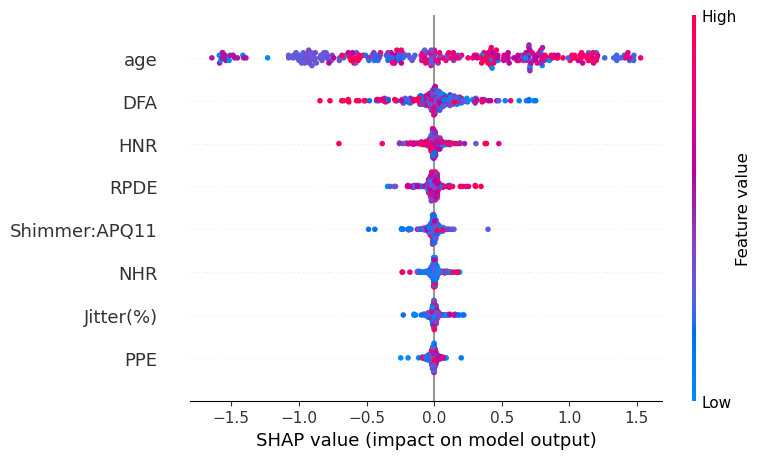

Plotting SHAP Bar Plot


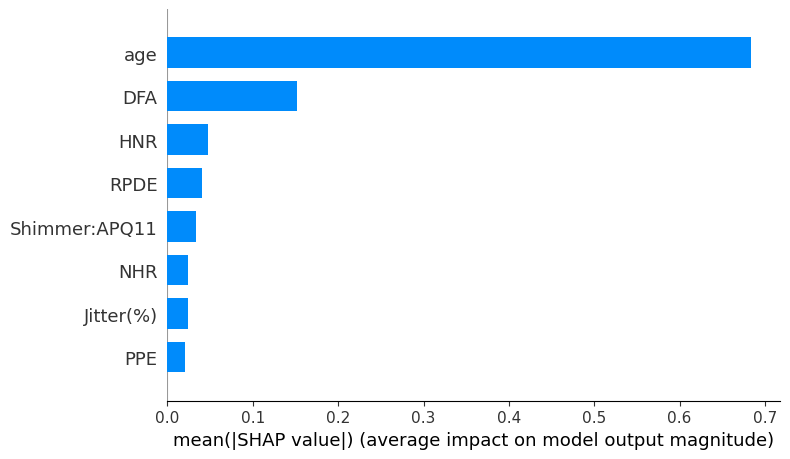

Plotting SHAP Dependence Plot: age


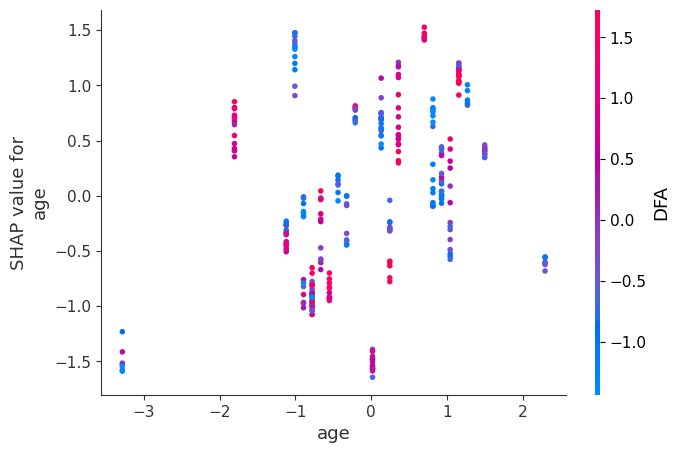

Plotting SHAP Decision Plot (Random Forest)


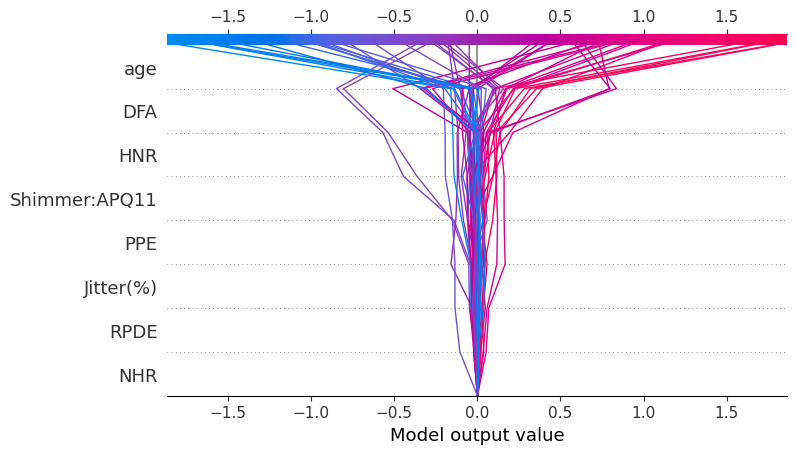

In [42]:
import shap
import numpy as np
import pandas as pd

print("\nPreparing data for SHAP analysis...")

# Extract base estimators from the Voting Regressor
explainer_rf = shap.TreeExplainer(voting.estimators_[0])  # RandomForest
explainer_dt = shap.TreeExplainer(voting.estimators_[1])  # DecisionTree
# voting.estimators_[2] is SVR → skip (not tree-based)

# Take a sample for SHAP analysis
X_sample = X_test[:300]
X_sample_df = pd.DataFrame(X_sample, columns=x.columns)

# Compute SHAP values for RF and DT
shap_values_rf = explainer_rf.shap_values(X_sample)
shap_values_dt = explainer_dt.shap_values(X_sample)

# Average SHAP values (combine both models)
shap_values_avg = (np.array(shap_values_rf) + np.array(shap_values_dt)) / 2

# ---- SHAP Visualizations ----
print("Plotting SHAP Summary Plot (dot type)")
shap.summary_plot(shap_values_avg, X_sample_df, plot_type="dot", show=True)

print("Plotting SHAP Bar Plot")
shap.summary_plot(shap_values_avg, X_sample_df, plot_type="bar", show=True)

# Dependence plot for the first feature
feature_name = X_sample_df.columns[0]
print(f"Plotting SHAP Dependence Plot: {feature_name}")
shap.dependence_plot(feature_name, shap_values_avg, X_sample_df, show=True)

# Decision plot for first 50 samples using RF explainer
print("Plotting SHAP Decision Plot (Random Forest)")
shap.decision_plot(
    explainer_rf.expected_value,
    shap_values_rf[:50],
    X_sample_df.iloc[:50]
)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

lstm_model=Sequential([LSTM(64,activation='tanh',input_shape=(1,X_train.shape[1])),
                       Dense(32,activation='relu'),
                       Dense(8,activation='relu'),
                       Dense(1,activation='linear')
])
lstm_model.compile(optimizer='adam',loss='mse',metrics=['mae'])

X_train_lstm=X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test_lstm=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))



history=lstm_model.fit(X_train_lstm,y_train,epochs=50,batch_size=8,validation_split=0.2,verbose=2)

y_pred_lstm=lstm_model.predict(X_test_lstm)

print("LSTM Result")
print("R2 Score: ",r2_score(y_test,y_pred_lstm))
print("RMSE: ",root_mean_squared_error(y_test,y_pred_lstm))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred_lstm))


Epoch 1/50


c:\Users\rakes\anaconda\envs\mlenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


470/470 - 7s - 15ms/step - loss: 0.8163 - mae: 0.7648 - val_loss: 0.6908 - val_mae: 0.6974
Epoch 2/50
470/470 - 2s - 5ms/step - loss: 0.6781 - mae: 0.6812 - val_loss: 0.6207 - val_mae: 0.6473
Epoch 3/50
470/470 - 3s - 6ms/step - loss: 0.6022 - mae: 0.6322 - val_loss: 0.5316 - val_mae: 0.5965
Epoch 4/50
470/470 - 2s - 5ms/step - loss: 0.5557 - mae: 0.6044 - val_loss: 0.4998 - val_mae: 0.5791
Epoch 5/50
470/470 - 3s - 6ms/step - loss: 0.5170 - mae: 0.5818 - val_loss: 0.5044 - val_mae: 0.5787
Epoch 6/50
470/470 - 3s - 6ms/step - loss: 0.4910 - mae: 0.5626 - val_loss: 0.4638 - val_mae: 0.5507
Epoch 7/50
470/470 - 2s - 5ms/step - loss: 0.4773 - mae: 0.5526 - val_loss: 0.4540 - val_mae: 0.5445
Epoch 8/50
470/470 - 2s - 5ms/step - loss: 0.4624 - mae: 0.5432 - val_loss: 0.4446 - val_mae: 0.5334
Epoch 9/50
470/470 - 2s - 5ms/step - loss: 0.4508 - mae: 0.5321 - val_loss: 0.4546 - val_mae: 0.5448
Epoch 10/50
470/470 - 2s - 5ms/step - loss: 0.4439 - mae: 0.5284 - val_loss: 0.4161 - val_mae: 0.5121

In [44]:
from tensorflow.keras.layers import GRU,Input

# Define GRU model
gru_model = Sequential([
    Input(shape=(1, X_train.shape[1])),
    GRU(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')  
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train
history = gru_model.fit(
    X_train_gru, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=2
)

y_pred_gru = gru_model.predict(X_test_gru)

print("GRU: Result")
print("R2 Score: ", r2_score(y_test, y_pred_gru))
print("RMSE: ", root_mean_squared_error(y_test, y_pred_gru))
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred_gru))

Epoch 1/50


470/470 - 4s - 9ms/step - loss: 0.7950 - mae: 0.7494 - val_loss: 0.6563 - val_mae: 0.6712
Epoch 2/50
470/470 - 2s - 4ms/step - loss: 0.6377 - mae: 0.6591 - val_loss: 0.6281 - val_mae: 0.6411
Epoch 3/50
470/470 - 1s - 2ms/step - loss: 0.5667 - mae: 0.6134 - val_loss: 0.5053 - val_mae: 0.5756
Epoch 4/50
470/470 - 1s - 2ms/step - loss: 0.5324 - mae: 0.5889 - val_loss: 0.4825 - val_mae: 0.5626
Epoch 5/50
470/470 - 1s - 3ms/step - loss: 0.4981 - mae: 0.5686 - val_loss: 0.4740 - val_mae: 0.5429
Epoch 6/50
470/470 - 1s - 2ms/step - loss: 0.4862 - mae: 0.5559 - val_loss: 0.4808 - val_mae: 0.5548
Epoch 7/50
470/470 - 1s - 2ms/step - loss: 0.4709 - mae: 0.5458 - val_loss: 0.4378 - val_mae: 0.5225
Epoch 8/50
470/470 - 1s - 2ms/step - loss: 0.4541 - mae: 0.5346 - val_loss: 0.4152 - val_mae: 0.5074
Epoch 9/50
470/470 - 1s - 2ms/step - loss: 0.4399 - mae: 0.5257 - val_loss: 0.4017 - val_mae: 0.5024
Epoch 10/50
470/470 - 1s - 3ms/step - loss: 0.4274 - mae: 0.5148 - val_loss: 0.4153 - val_mae: 0.5063


# voting classifier has highest R2 score of 0.81

In [45]:
import joblib
joblib.dump(voting, "motor_UPDRS_model.pkl")
joblib.dump(scaler_x,"scalar_x_for_motor_UPDRS")
joblib.dump(scaler_y,"scalar_y_for_motor_UPDRS")

['scalar_y_for_motor_UPDRS']

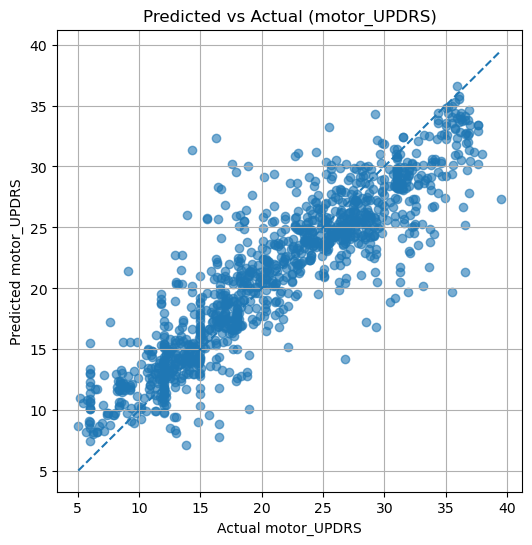

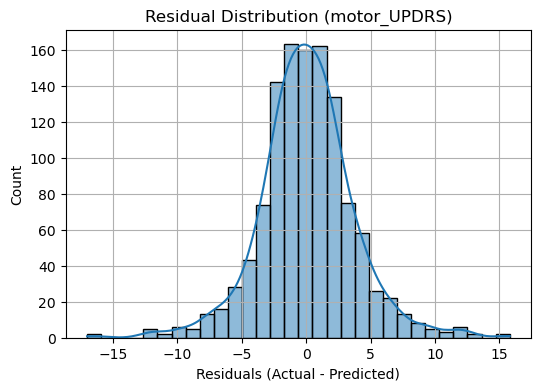

In [ ]:

y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_voting)

plt.figure(figsize=(6,6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         linestyle='--')
plt.xlabel("Actual motor_UPDRS")
plt.ylabel("Predicted motor_UPDRS")
plt.title("Predicted vs Actual (motor_UPDRS)")
plt.grid(True)
plt.show()



residuals = y_test_inv.flatten() - y_pred_inv.flatten()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution (motor_UPDRS)")
plt.grid(True)
plt.show()
